# Regression

We already covered classification. The other half of supervised learning is regression. Whereas classification was about learning a decision boundary to separate the data according to given labels (e.g. 0 or 1), regresssion is about learning a _continuous_ functional relationship on the input data. Again, Scikit-Learn has all kinds of tools to do this. We again start by loading the necessary libraries and setting the random seed. Note that many of the models used for classification can be used for regression as well with minor modifications.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(1)

Our goal for this discussion will be to learn the function $y = f(x) = 3 - 2x - x^2 + x^3$ from a noisy pair of features $X$ and targets $y$. The targets were sampled from the above function on $X$ with some Gaussian noise added in. Since we're doing supervised learning, we again must make sure to split the data into a training set, and a test set for model evaluation. The raw data is plotted below.

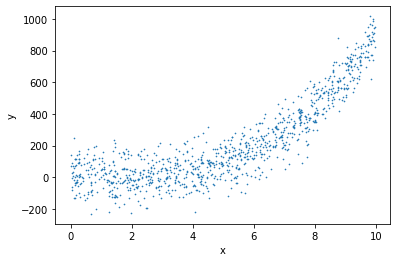

In [2]:
def gen_data(f, size=1000, num_features=1):
    X = 10.*np.random.rand(size,num_features)
    y = f(X)
    noise = 0.1
    y += noise*(np.max(y)-np.min(y))*np.random.randn(len(y))
    return X,y

def plot_model(model, X, y):
    plt.scatter(X[:,0],y,s=0.4)
    if model is not None:
        xx = np.linspace(np.min(X),np.max(X),num=1000)
        yy = model.predict(xx.reshape(-1,1))
        plt.plot(xx,yy,color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

f = lambda x: 3 - 2*x[:,0] - x[:,0]**2 + x[:,0]**3     # y = 3 - 2x - x^2 + x^3

X,y = gen_data(f)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plot_model(None,X,y)

In [3]:
def get_scores(model, X_train, y_train, X_test, y_test):
    yhat = model.predict(X_train)
    score = r2_score(y_train, yhat)
    print(f'Train r-squared: {round(score,3)}')
    
    yhat = model.predict(X_test)
    score = r2_score(y_test, yhat)
    print(f'Test r-squared: {round(score,3)}')

    yhat = model.predict(X_train)
    score = mean_squared_error(y_train, yhat)
    print(f'Train MSE: {round(score,3)}')        
          
    yhat = model.predict(X_test)
    score = mean_squared_error(y_test, yhat)
    print(f'Test MSE: {round(score,3)}')

The one approach to regression you've likely seen before is [linear regression](https://en.wikipedia.org/wiki/Linear_regression). LR seeks to learn the best _linear function_ $$\hat y(x) = w^Tx+b = \sum_i w_i x_i + b$$ to fit the data, where "learn" means estimating the optimal parameters $w,b$. In the case where you only have one feature $x$, LR is just learning the best line $\hat y = wx + b$. Since basic LR can only learn lines, its practical utility is rather limited unless you know something about the data beforehand, or can transform it to make it look linear.

Also, note that we do not use accuracy to evaluate regression models. We instead use $R^2$, aka the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), which seeks to measure how far the learned function $\hat y$ is from the real target value $y$ at each point. Similar to accuracy, the higher $R^2$ is, the better the learned function fits the data. Also like accuracy, it can also only take values between 0 and 1. Another popular metric is the mean squared error (MSE), which we also report. Lower MSEs equate to better performance, with an MSE of 0 meaning the model perfectly fits the data.

Train r-squared: 0.71
Test r-squared: 0.704
Train MSE: 19836.914
Test MSE: 22885.799


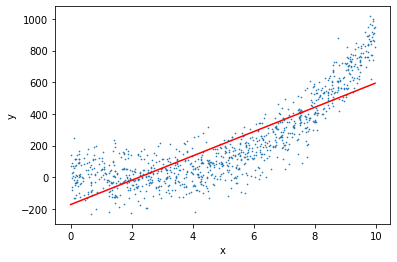

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

get_scores(model, X_train, y_train, X_test, y_test)
plot_model(model, X, y)

One can also use [KNN with regression](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#k-NN_regression). With regression, KNN calculates the mean of the $k$ nearest points and uses that to make a prediction, $$\hat y(x) = \text{mean}(y_1,\dots,y_k),$$ where $x_1,\dots,x_k$ are the $k$ closest values to $x$, having labels $y_1,\dots,y_k$. KNN suffers from the same problems that KNN does in classification: It's often slow, can very easily overfit the data, and doesn't scale well to high-dimensional feature spaces ("curse of dimensionality").

Train r-squared: 0.888
Test r-squared: 0.878
Train MSE: 7643.364
Test MSE: 9405.453


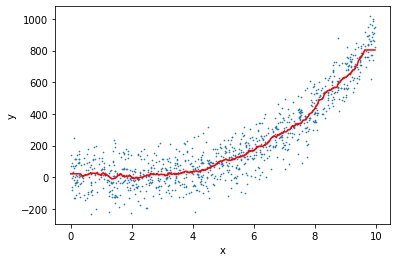

In [5]:
model = KNeighborsRegressor(n_neighbors=50)
model.fit(X_train, y_train)

get_scores(model, X_train, y_train, X_test, y_test)
plot_model(model, X, y)

Random forests also work for regression just as well. Note the sklearn API just swaps `*Classifier` with `*Regressor`, which it usually does.

Train r-squared: 0.886
Test r-squared: 0.871
Train MSE: 7820.247
Test MSE: 9958.151


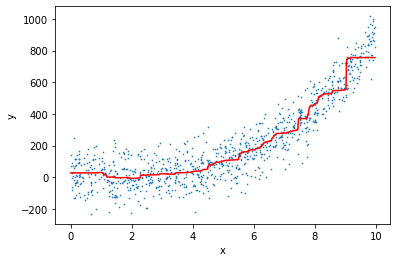

In [6]:
model = RandomForestRegressor(n_estimators=100,min_samples_leaf=40)
model.fit(X_train, y_train)

get_scores(model, X_train, y_train, X_test, y_test)
plot_model(model, X, y)

Just so you've seen it once, here's an example of using a neural network in sklearn. The only type of neural net that is supported in sklearn is the simple [multilayer perceptron](https://en.wikipedia.org/wiki/Feedforward_neural_network). It doesn't support more modern deep learning models, so we'll have to use something else when we do that. Most of the time though, even with MLPs you want to use a different framework than sklearn as it's not good for this kind of thing for a whole bunch of reasons. But here's an example anyway.

As you can see by the number of hyperparameters I specified in instantiating the model, neural nets can be very finnicky to train, but if tuned properly they can work really well. Notice how much smoother this curve looks. Away from the endpoints it looks a lot like the function we're trying to estimate.

Train r-squared: 0.887
Test r-squared: 0.884
Train MSE: 7711.04
Test MSE: 8980.605


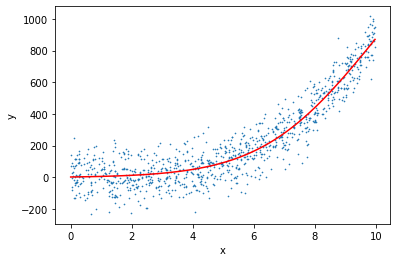

In [7]:
model = MLPRegressor(hidden_layer_sizes=(5,5), solver='lbfgs', learning_rate_init=1e-7, max_iter=20000, 
                     tol=1e-12, activation='tanh', batch_size=32)
model.fit(X_train, y_train)

get_scores(model, X_train, y_train, X_test, y_test)
plot_model(model, X, y)

We can also use GBMs for regression just as easily. Just like for classification, GBMs will often give you state of the art results for near minimal effort, and usually outperforms deep learning techniques (at least to date) in most common situations where you don't have a huge amount of data and a huge amount of features.

Train r-squared: 0.884
Test r-squared: 0.857
Train MSE: 7971.564
Test MSE: 11042.555


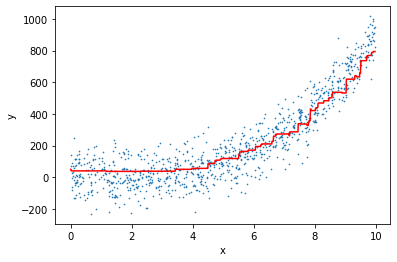

In [8]:
model = GradientBoostingRegressor(n_estimators=20)
model.fit(X_train, y_train)

get_scores(model, X_train, y_train, X_test, y_test)
plot_model(model, X, y)